In [1]:
# Imporing libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor, plot_tree

import matplotlib.pyplot  as plt

In [2]:
con = pd.read_csv("Cases\Concrete Strength\Concrete_Data.csv")

In [3]:
con.head()

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 2022,
                                                    train_size = 0.7)

In [41]:
y = con["Strength"]

X = con.drop("Strength", axis = 1)

In [42]:
dtr = DecisionTreeRegressor(random_state = 2022,
                           max_depth = 2)

dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2022)

# Plotting the Decision Tree Plot

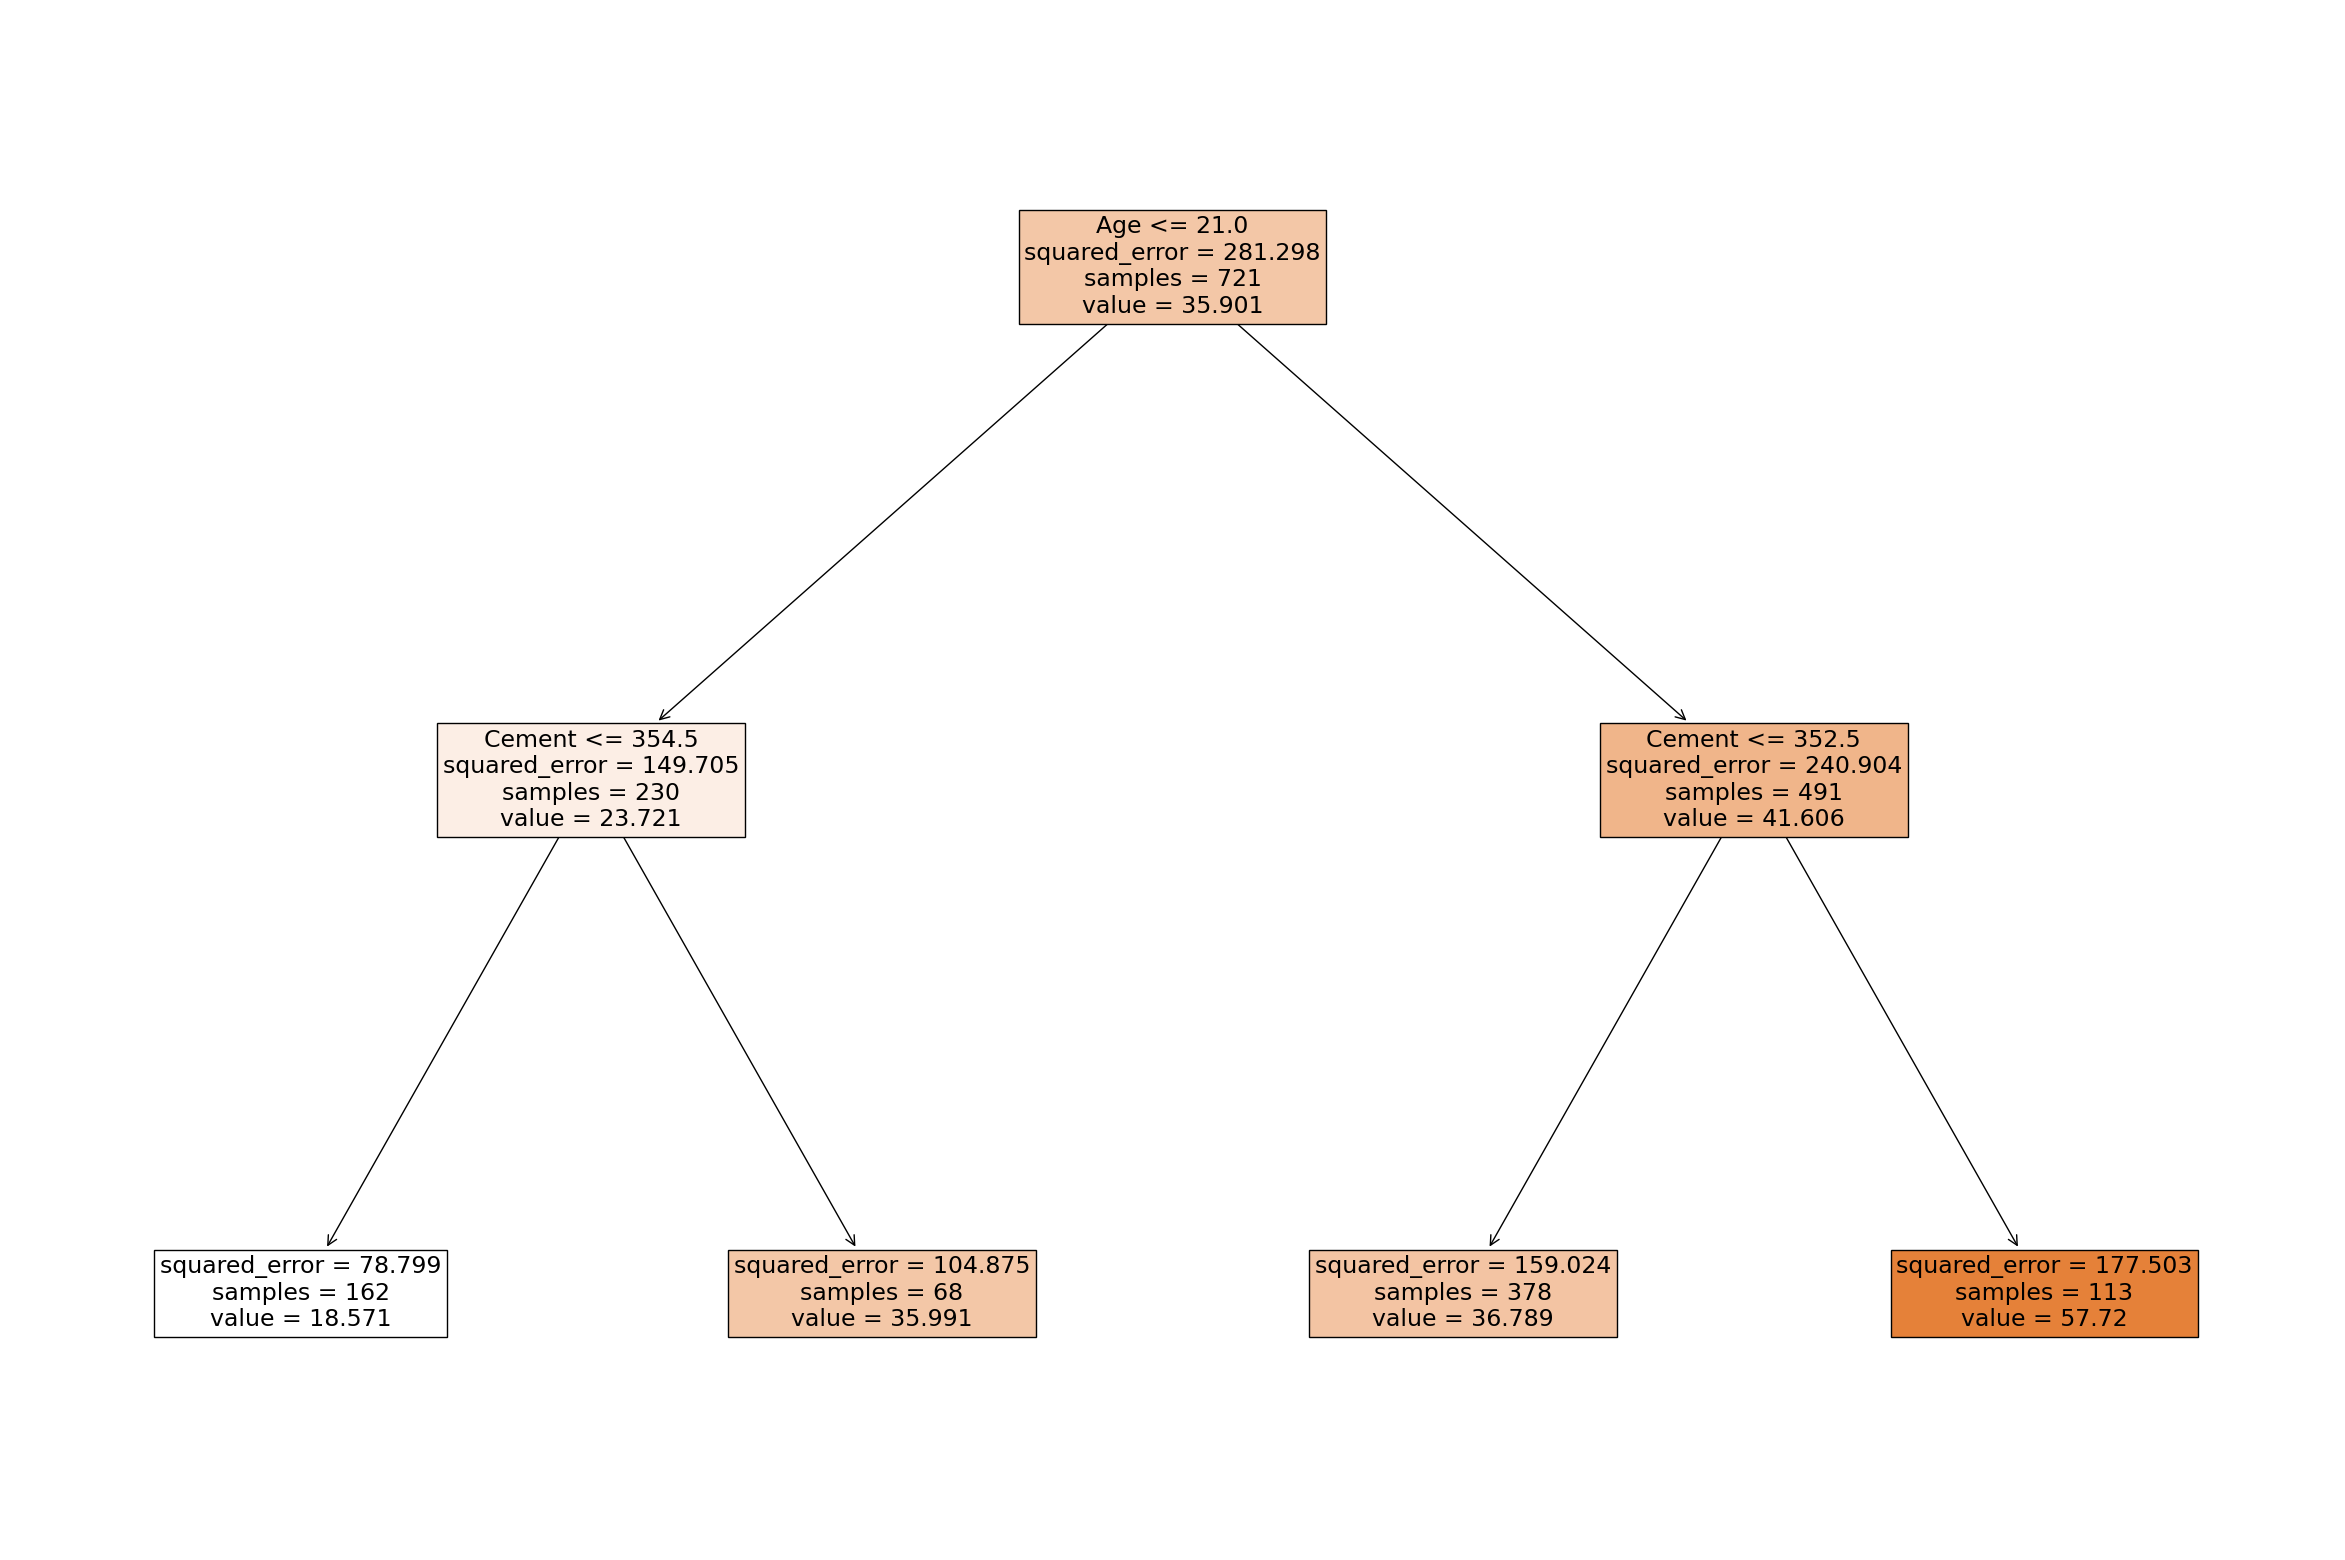

In [43]:
plt.figure(figsize = (30, 20))
plot_tree(dtr, feature_names = X.columns,
         fontsize = 17, filled = True)
plt.show()

In [44]:
y_pred = dtr.predict(X_test)
print(r2_score(y_test, y_pred))

0.4270941483720333


In [45]:
params = {'max_depth':[2,3,4,5,None],
         'min_samples_split':[2,5,10],
         'min_samples_leaf':[1,5,10]}

In [46]:
kfold = StratifiedKFold(n_splits = 5,
                       shuffle = True,
                       random_state = 2022)

In [48]:
gcv  = GridSearchCV(dtr, param_grid = params,
                    verbose=3, cv = kfold,
                    scoring = 'r2')
gcv.fit(X,y)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [31]:
print(best_model.feature_importances_)

imps = best_model.feature_importances_
plt.barh(X.columns, imps)
plt.title("Important Features")
plt.show()

NameError: name 'best_model' is not defined

In [15]:
# Sorted Plot

In [17]:
i_sorted = np.argsort(-imps)
n_sorted = X.columns[i_sorted]

imp_sort = imps[i_sorted]

plt.barh(n_sorted, imp_sort)
plt.title("Sorted Feature Importance")
plt.show()

NameError: name 'imps' is not defined